# sklearn document
- Common pitfalls in the interpretation of coefficients of linear models
- https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#id1

In [90]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [124]:
from sklearn.datasets import fetch_openml
survey = fetch_openml(data_id=534, as_frame=True)

c:\Users\sjkim\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [125]:
X = survey.data[survey.feature_names]
X.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,35,White,Other,Other,Married


In [126]:
X.describe(include="all")

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
count,534.000000,534,534,534.000000,534,534.000000,534,534,534,534
unique,NaN,2,2,NaN,2,NaN,3,6,3,2
top,NaN,no,male,NaN,not_member,NaN,White,Other,Other,Married
freq,NaN,378,289,NaN,438,NaN,440,156,411,350
mean,13.018727,NaN,NaN,17.822097,NaN,36.833333,NaN,NaN,NaN,NaN
std,2.615373,NaN,NaN,12.379710,NaN,11.726573,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,0.000000,NaN,18.000000,NaN,NaN,NaN,NaN
25%,12.000000,NaN,NaN,8.000000,NaN,28.000000,NaN,NaN,NaN,NaN
50%,12.000000,NaN,NaN,15.000000,NaN,35.000000,NaN,NaN,NaN,NaN
75%,15.000000,NaN,NaN,26.000000,NaN,44.000000,NaN,NaN,NaN,NaN


In [129]:
X['EDUCATION100'] = X['EDUCATION']*100
X

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR,EDUCATION100
0,8,no,female,21,not_member,35,Hispanic,Other,Manufacturing,Married,800
1,9,no,female,42,not_member,57,White,Other,Manufacturing,Married,900
2,12,no,male,1,not_member,19,White,Other,Manufacturing,Unmarried,1200
3,12,no,male,4,not_member,22,White,Other,Other,Unmarried,1200
4,12,no,male,17,not_member,35,White,Other,Other,Married,1200
...,...,...,...,...,...,...,...,...,...,...,...
529,18,no,male,5,not_member,29,White,Professional,Other,Unmarried,1800
530,12,no,female,33,not_member,51,Other,Professional,Other,Married,1200
531,17,no,female,25,member,48,Other,Professional,Other,Married,1700
532,12,yes,male,13,member,31,White,Professional,Other,Married,1200


In [130]:
y = survey.target.values.ravel()
X.shape, y.shape

((534, 11), (534,))

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [132]:
X_train.shape, y_train.shape

((400, 11), (400,))

In [133]:
train_dataset = X_train.copy()
train_dataset.insert(0, "WAGE", y_train)
#_ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

In [134]:
train_dataset.head()

,WAGE,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR,EDUCATION100
204,10.62,16,no,female,6,not_member,28,White,Management,Manufacturing,Married,1600
196,9.37,16,no,female,26,not_member,48,White,Management,Other,Married,1600
510,9.50,17,no,female,14,not_member,37,White,Professional,Other,Married,1700
19,20.55,12,no,male,33,not_member,51,White,Other,Other,Married,1200
361,4.50,16,no,male,21,not_member,43,White,Service,Other,Married,1600


In [135]:
survey.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EDUCATION   534 non-null    int64   
 1   SOUTH       534 non-null    category
 2   SEX         534 non-null    category
 3   EXPERIENCE  534 non-null    int64   
 4   UNION       534 non-null    category
 5   AGE         534 non-null    int64   
 6   RACE        534 non-null    category
 7   OCCUPATION  534 non-null    category
 8   SECTOR      534 non-null    category
 9   MARR        534 non-null    category
dtypes: category(7), int64(3)
memory usage: 17.2 KB


In [136]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["RACE", "OCCUPATION", "SECTOR", "MARR", "UNION", "SEX", "SOUTH"]
numerical_columns = ["EDUCATION", "EXPERIENCE", "AGE"]

preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), categorical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)


In [137]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10), func=np.log10, inverse_func=sp.special.exp10
    ),
)
model.fit(X_train, y_train)


c:\Users\sjkim\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.46553e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['RACE', 'OCCUPATION',
                                                   'SECTOR', 'MARR', 'UNION',
                                                   'SEX', 'SOUTH'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

In [138]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import PredictionErrorDisplay

mae_train = median_absolute_error(y_train, model.predict(X_train))
y_pred = model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f} $/hour",
    "MedAE on testing set": f"{mae_test:.2f} $/hour",
}
scores

{'MedAE on training set': '2.14 $/hour', 'MedAE on testing set': '2.22 $/hour'}

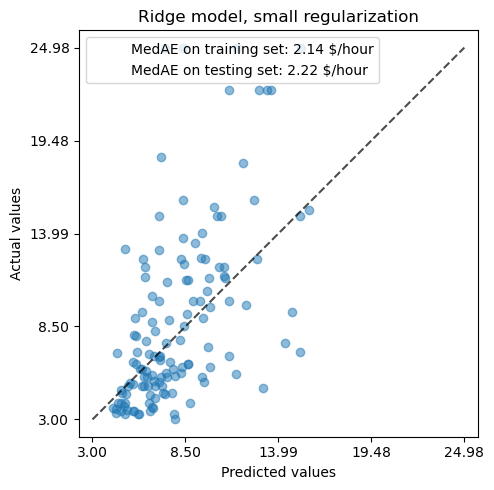

In [139]:
_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Ridge model, small regularization")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

In [140]:
feature_names = model[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs


,Coefficients
RACE_Hispanic,-0.013600
RACE_Other,-0.009156
RACE_White,0.022513
OCCUPATION_Clerical,0.000498
OCCUPATION_Management,0.090981
OCCUPATION_Other,-0.024649
OCCUPATION_Professional,0.072416
OCCUPATION_Sales,-0.046183
OCCUPATION_Service,-0.090600
SECTOR_Construction,-0.000304


In [123]:
edu1 = coefs.loc['EDUCATION']

In [141]:
edu2 = coefs.loc['EDUCATION']
edu3 = coefs.loc['EDUCATION100']

In [143]:
print("The coefficient of 'EDUCATION' when EDU100 is not included :", edu1)
print("The coefficient of 'EDUCATION' when EDU100 is included :", edu2)
print("The coefficient of 'EDUCATION100' when EDU100 is included :", edu3)


The coefficient of 'EDUCATION' when EDU100 is not included : Coefficients    0.054699
Name: EDUCATION, dtype: float64
The coefficient of 'EDUCATION' when EDU100 is included : Coefficients   -0.064533
Name: EDUCATION, dtype: float64
The coefficient of 'EDUCATION100' when EDU100 is included : Coefficients    0.001192
Name: EDUCATION100, dtype: float64


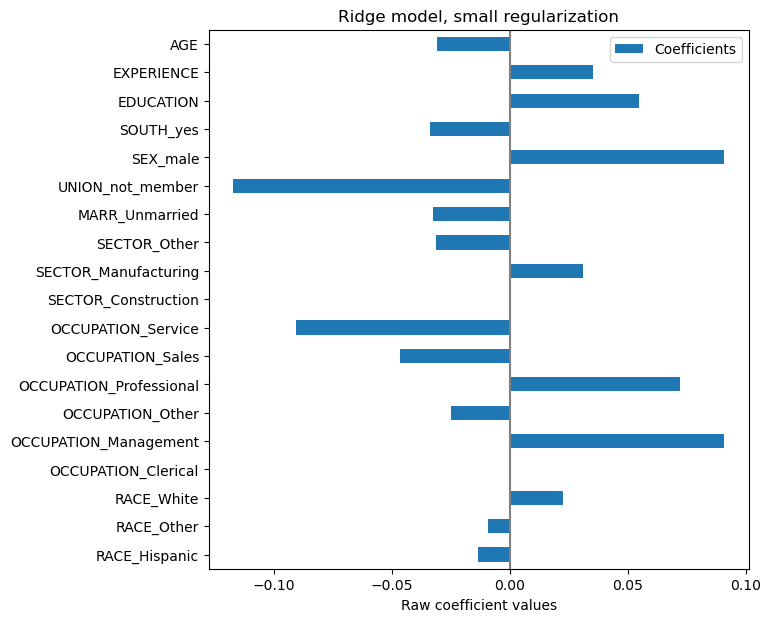

In [43]:
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)


# datascienceschool.net
- https://datascienceschool.net/03%20machine%20learning/04.01%20%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%20%EC%98%88%EC%A0%9C.html

In [147]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [161]:
feature_name = ['CRIM', 'ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

In [162]:
dfX = pd.DataFrame(data, columns=feature_name)
dfy = pd.DataFrame(target, columns=["MEDV"])
dfX

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [165]:
dfX.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [163]:
import statsmodels.api as sm
df = pd.concat([dfX, dfy], axis=1)

model1 = sm.OLS.from_formula("MEDV ~ " + "+".join(feature_name), data=df)
result1 = model1.fit()
print(result1.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 26 Jan 2023   Prob (F-statistic):          6.72e-135
Time:                        16:36:41   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

# statology.org(sklearn)
- https://www.statology.org/sklearn-linear-regression-summary/

In [166]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'x1': [1, 2, 2, 4, 2, 1, 5, 4, 2, 4, 4],
                   'x2': [1, 3, 3, 5, 2, 2, 1, 1, 0, 3, 4],
                   'y': [76, 78, 85, 88, 72, 69, 94, 94, 88, 92, 90]})

#view first five rows of DataFrame
df.head()

,x1,x2,y
0,1,1,76
1,2,3,78
2,2,3,85
3,4,5,88
4,2,2,72


In [167]:
from sklearn.linear_model import LinearRegression

#initiate linear regression model
model = LinearRegression()

#define predictor and response variables
X, y = df[['x1', 'x2']], df.y

#fit regression model
model.fit(X, y)

LinearRegression()

In [169]:
#display regression coefficients and R-squared value of model
print(model.intercept_, model.coef_, model.score(X, y))

70.48282057040197 [ 5.79452055 -1.15764653] 0.7667425565278788


# statology.org(statsmodel)

In [170]:
import statsmodels.api as sm

#define response variable
y = df['y']

#define predictor variables
x = df[['x1', 'x2']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     13.15
Date:                Thu, 26 Jan 2023   Prob (F-statistic):            0.00296
Time:                        16:48:05   Log-Likelihood:                -31.191
No. Observations:                  11   AIC:                             68.38
Df Residuals:                       8   BIC:                             69.57
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4828      3.749     18.803      0.0

c:\Users\sjkim\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
